In [22]:
from astropy.table import Table, vstack
from astropy.io import fits
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from python_modules.muonpipe import usefull_func
import numpy as np
import pandas as pd
from python_modules.muonpipe.usefull_func import hist_wo_outliers, atmo_thick

size_outside = 400 # phe

In [30]:
filepath = '/Users/vdk/muons2024/cscs_simulations/muon_table_run2.fits'
dat = Table.read(filepath)
df = dat.to_pandas()
df_good_data = df[df['good_ring']]

df_good_data.columns
np.mean(df_good_data['muon_efficiency'])

0.19774042608424794

In [31]:
listdir = glob.glob('/Users/vdk/muons2024/cscs_simulations/tables_large_lst_muons/*')
listdir2 = glob.glob('/Users/vdk/muons2024/cscs_simulations/muons_zenith0/*')
# Muons analyzed using GlobalPeakWindowSum
listdir=listdir+listdir2
dat = Table.read('{}'.format(listdir[0]), format='fits')

for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])

        
df = dat.to_pandas()
df_good_data = df[df['good_ring']]
np.mean(df_good_data['muon_efficiency'])

0.20323219800837047

In [32]:
new_df = df_good_data[df_good_data['muon_efficiency'] < 1]
new_df

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
2,900,NaN,0.014032,2396.951172,0.0,-1.247734,-0.412540,1.113251,0.051338,True,...,4.122101,-3.899752,1.335535,0.047637,-0.062701,0.085056,350,1.404032,NaN,NaN
3,901,NaN,0.014032,2448.197021,0.0,-1.271536,-0.404110,1.161185,0.063030,True,...,7.468650,5.898939,4.580747,0.054429,-0.282235,-0.156087,364,1.346390,NaN,NaN
4,902,NaN,0.014032,2431.400635,0.0,-1.275276,-0.446742,1.163275,0.076051,True,...,7.906407,4.973485,-6.146196,0.059127,-0.343973,-0.043235,352,1.522225,NaN,NaN
5,903,NaN,0.014032,1971.720215,0.0,-1.269181,-0.421179,1.099196,0.064210,True,...,6.847211,-6.240914,2.816965,0.051054,0.075208,0.038261,339,1.480657,NaN,NaN
6,904,NaN,0.014032,2366.203857,0.0,-1.245463,-0.442997,1.142377,0.063722,True,...,5.804691,-1.284745,-5.660730,0.055387,-0.078443,-0.243420,357,1.361072,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807085,970000,NaN,0.013174,2218.200439,0.0,-0.566220,-1.437932,1.131483,0.115150,True,...,8.198845,-3.860449,-7.233118,0.088844,-0.784041,0.074886,302,1.479998,NaN,NaN
807087,976200,NaN,0.062754,2097.934082,0.0,-1.457503,-0.533363,1.216920,0.055488,True,...,5.417313,0.060517,-5.416974,0.046555,-0.354301,0.388168,316,1.456937,NaN,NaN
807094,986600,NaN,0.136628,2197.463379,0.0,-1.334132,-1.617977,1.252503,0.060262,True,...,8.175202,3.446564,-7.413172,0.052360,-0.892657,0.940751,256,1.374874,NaN,NaN
807096,989200,NaN,0.061017,3125.099365,0.0,-0.265611,-0.257579,1.238836,0.052785,True,...,7.705101,-3.836817,-6.681872,0.046983,0.551891,0.336228,534,1.431748,NaN,NaN


Mean value of the array = 0.19954091223740106 
Standard deviation = 0.023684051280495094


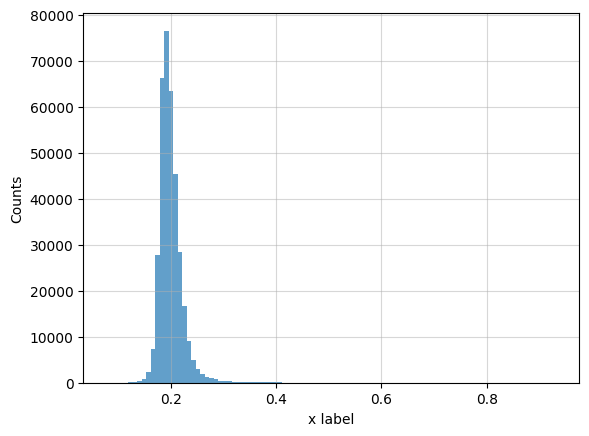

In [25]:
hist_wo_outliers(new_df['muon_efficiency'], outlier_value=5)

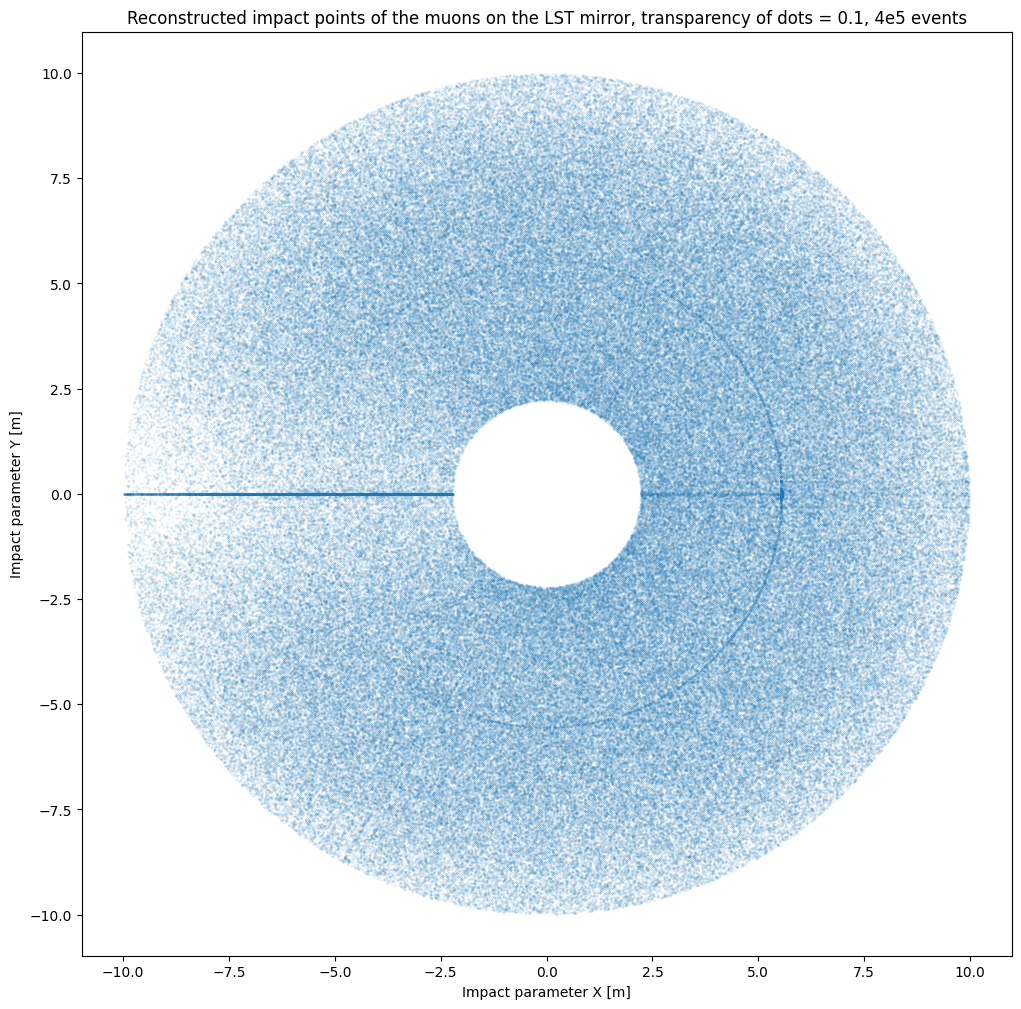

In [36]:
plt.figure(figsize=(12,12))
plt.scatter(new_df['impact_x_array'], new_df['impact_y_array'], alpha = 0.1, s = 1, marker = 'x')
plt.xlabel("Impact parameter X [m]")
plt.ylabel("Impact parameter Y [m]")
plt.title("Reconstructed impact points of the muons on the LST mirror, transparency of dots = 0.1, 4e5 events")
plt.savefig('/Users/vdk/muons2024/images/plots_for_talk/ImpactParameter_Simulations_zenith0.png', dpi=200, format='png', bbox_inches='tight')

In [13]:
mean_opt_eff = np.mean(df_good_data['muon_efficiency'])
mean_ring_width = np.mean(df_good_data['ring_width'])
mean_ring_radius = np.mean(df_good_data['ring_radius'])
mean_ring_size = np.mean(df_good_data['ring_size'])
mean_impact_parameter = np.mean(df_good_data['impact_parameter'])
print(np.mean(df_good_data['muon_efficiency']))
print(np.mean(df_good_data['ring_width']))
print(mean_ring_radius)

0.20158866241561973
0.07159846385325183
1.124024221164684


In [28]:
df_good_data.columns

Index(['event_id', 'event_time', 'mc_energy', 'ring_size', 'size_outside',
       'ring_center_x', 'ring_center_y', 'ring_radius', 'ring_width',
       'good_ring', 'muon_efficiency', 'ring_containment', 'ring_completeness',
       'impact_parameter', 'impact_x_array', 'impact_y_array', 'radial_stdev',
       'radial_skewness', 'radial_excess_kurtosis', 'num_pixels_in_ring',
       'mean_pixel_charge_around_ring', 'hg_peak_sample', 'lg_peak_sample'],
      dtype='object')

In [36]:
param = 'ring_completeness'
print(f"Min value of {param} = {min(df_good_data[param])}")
print(f"Max value of {param} = {max(df_good_data[param])}")

Min value of ring_completeness = 0.03333333333333333
Max value of ring_completeness = 1.0


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_6700/3068753348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=500)


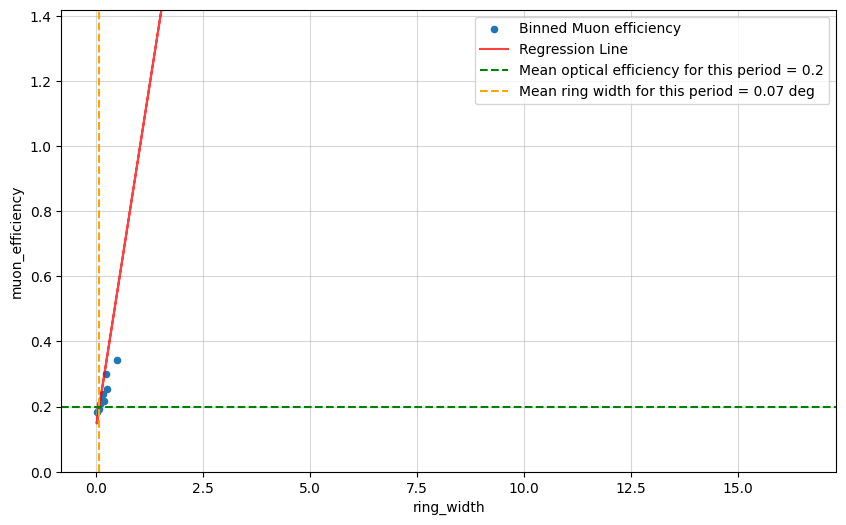

In [72]:
x_value_str = 'ring_width'
y_value_str = 'muon_efficiency'

# Step 1: Create bins for 'ring_radius'
df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=500)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of binned values
plt.scatter(binned_data['bin_mid'], binned_data[y_value_str], label='Binned Muon efficiency', s = 20)

# Calculate and plot the regression line over the original data
m, b = np.polyfit(df_good_data[x_value_str], df_good_data[y_value_str], 1)
plt.plot(df_good_data[x_value_str], m*df_good_data[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)

plt.xlabel(f'{x_value_str}')
plt.ylabel(f'{y_value_str}')
plt.axhline(y=mean_opt_eff, color='g', linestyle='--', label = f'Mean optical efficiency for this period = {round(mean_opt_eff, 3)}')
plt.axvline(x=mean_ring_width, color='orange', linestyle='--', label = f'Mean ring width for this period = {round(mean_ring_width,3)} deg')
plt.legend()
plt.ylim(0,1.42)
#plt.xlim(0,0.3)
plt.grid(alpha=0.5)
#plt.show()
#plt.savefig('/home/jovyan/XImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/home/jovyan/OptEffVSImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/Users/vdk/muons2024/images/WidthVsEfficiency_29-23Y_ylim2.png', dpi=200, format='png', bbox_inches='tight')

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_6700/1991868434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=500)


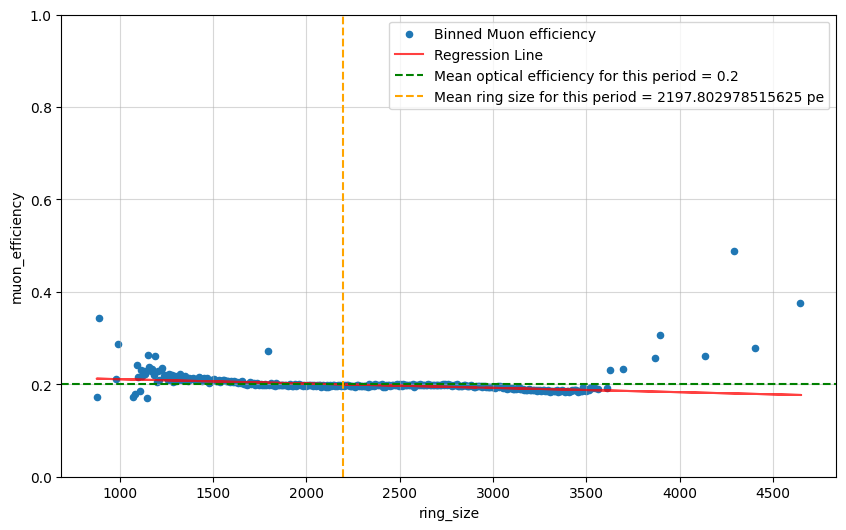

In [73]:
x_value_str = 'ring_size'
y_value_str = 'muon_efficiency'

# Step 1: Create bins for 'ring_radius'
df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=500)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of binned values
plt.scatter(binned_data['bin_mid'], binned_data[y_value_str], label='Binned Muon efficiency', s=20)

# Calculate and plot the regression line over the original data
m, b = np.polyfit(df_good_data[x_value_str], df_good_data[y_value_str], 1)
plt.plot(df_good_data[x_value_str], m*df_good_data[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)

plt.xlabel(f'{x_value_str}')
plt.ylabel(f'{y_value_str}')
plt.axhline(y=mean_opt_eff, color='g', linestyle='--', label = f'Mean optical efficiency for this period = {round(mean_opt_eff, 3)}')
plt.axvline(x=mean_ring_size, color='orange', linestyle='--', label = f'Mean ring size for this period = {round(mean_ring_size,3)} pe')
plt.legend()
plt.ylim(0,1)
#plt.xlim(0,0.3)
plt.grid(alpha=0.5)
#plt.show()
#plt.savefig('/home/jovyan/XImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/home/jovyan/OptEffVSImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/Users/vdk/muons2024/images/SizeEfficiency_19-23Y_ylim2.png', dpi=200, format='png', bbox_inches='tight')

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_6700/1740634220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=500)


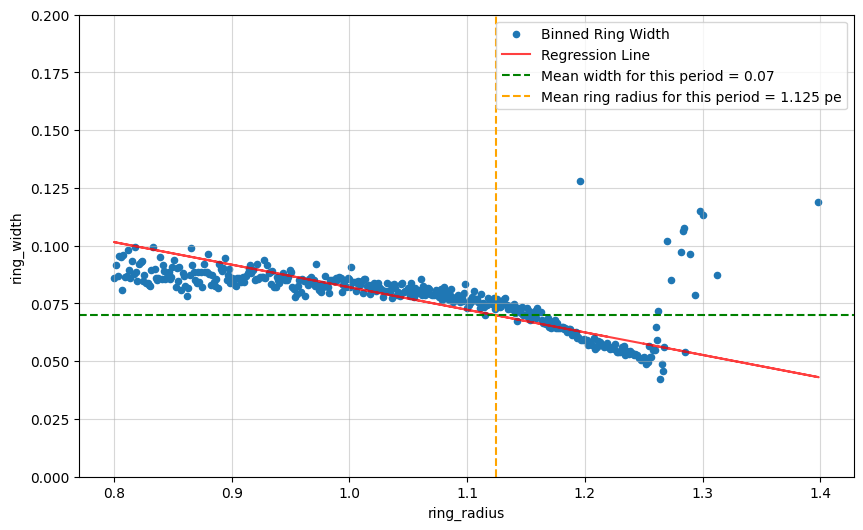

In [74]:
x_value_str = 'ring_radius'
y_value_str = 'ring_width'

# Step 1: Create bins for 'ring_radius'
df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=500)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of binned values
plt.scatter(binned_data['bin_mid'], binned_data[y_value_str], label='Binned Ring Width', s=20)

# Calculate and plot the regression line over the original data
m, b = np.polyfit(df_good_data[x_value_str], df_good_data[y_value_str], 1)
plt.plot(df_good_data[x_value_str], m*df_good_data[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)

plt.xlabel(f'{x_value_str}')
plt.ylabel(f'{y_value_str}')
plt.axhline(y=mean_ring_width, color='g', linestyle='--', label = f'Mean width for this period = {round(mean_ring_width, 3)}')
plt.axvline(x=mean_ring_radius, color='orange', linestyle='--', label = f'Mean ring radius for this period = {round(mean_ring_radius,3)} pe')
plt.legend()
plt.ylim(0,0.2)
#plt.xlim(0,0.3)
plt.grid(alpha=0.5)
#plt.show()
#plt.savefig('/home/jovyan/XImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/home/jovyan/OptEffVSImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/Users/vdk/muons2024/images/RadiusVsWidth_19-23Y.png', dpi=200, format='png', bbox_inches='tight')

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_6700/885588058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=500)


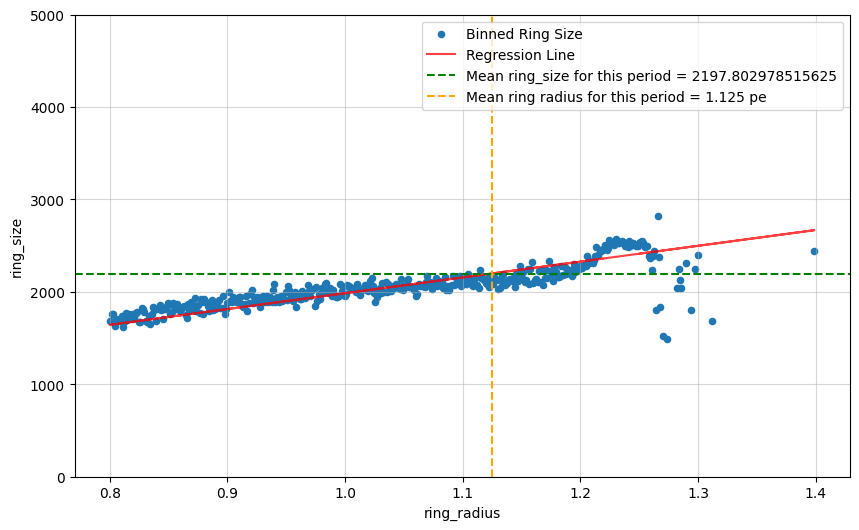

In [75]:
x_value_str = 'ring_radius'
y_value_str = 'ring_size'

# Step 1: Create bins for 'ring_radius'
df_good_data[f'{x_value_str}_bin'] = pd.cut(df_good_data[x_value_str], bins=500)

# Step 2: Group by the new bin column and calculate mean 'ring_size' for each bin
binned_data = df_good_data.groupby(f'{x_value_str}_bin')[y_value_str].mean().reset_index()

# Step 3: Convert the bin intervals to strings (for plotting) or use midpoints
binned_data['bin_mid'] = binned_data[f'{x_value_str}_bin'].apply(lambda x: x.mid)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of binned values
plt.scatter(binned_data['bin_mid'], binned_data[y_value_str], label='Binned Ring Size', s=20)

# Calculate and plot the regression line over the original data
m, b = np.polyfit(df_good_data[x_value_str], df_good_data[y_value_str], 1)
plt.plot(df_good_data[x_value_str], m*df_good_data[x_value_str] + b, color='red', label='Regression Line', alpha = 0.75)

plt.xlabel(f'{x_value_str}')
plt.ylabel(f'{y_value_str}')
plt.axhline(y=mean_ring_size, color='g', linestyle='--', label = f'Mean ring_size for this period = {round(mean_ring_size, 3)}')
plt.axvline(x=mean_ring_radius, color='orange', linestyle='--', label = f'Mean ring radius for this period = {round(mean_ring_radius,3)} pe')
plt.legend()
plt.ylim(0,5000)
#plt.xlim(0,0.3)
plt.grid(alpha=0.5)
#plt.show()
#plt.savefig('/home/jovyan/XImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/home/jovyan/OptEffVSImpact.png', dpi=300, format='png', bbox_inches='tight')
#plt.savefig('/Users/vdk/muons2024/images/RadiusVsSize_19-23Y.png', dpi=200, format='png', bbox_inches='tight')